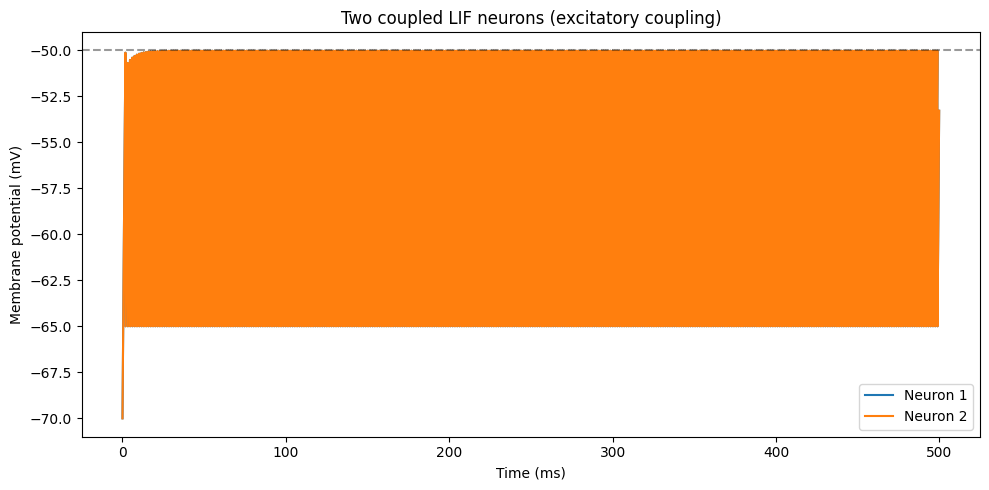

Spike times neuron 1: [  1.8   3.2   4.6   6.    7.4   8.8  10.2  11.6  13.   14.4  15.8  17.2
  18.6  20.   21.4  22.8  24.2  25.6  27.   28.4  29.8  31.2  32.6  34.
  35.4  36.8  38.2  39.6  41.   42.4  43.8  45.2  46.6  48.   49.4  50.8
  52.2  53.6  55.   56.4  57.8  59.2  60.6  62.   63.4  64.8  66.2  67.6
  69.   70.4  71.8  73.2  74.6  76.   77.4  78.8  80.2  81.6  83.   84.4
  85.8  87.2  88.6  90.   91.4  92.8  94.2  95.6  97.   98.4  99.8 101.2
 102.6 104.  105.4 106.8 108.2 109.6 111.  112.4 113.8 115.2 116.6 118.
 119.4 120.8 122.2 123.6 125.  126.4 127.8 129.2 130.6 132.  133.4 134.8
 136.2 137.6 139.  140.4 141.8 143.2 144.6 146.  147.4 148.8 150.2 151.6
 153.  154.4 155.8 157.2 158.6 160.  161.4 162.8 164.2 165.6 167.  168.4
 169.8 171.2 172.6 174.  175.4 176.8 178.2 179.6 181.  182.4 183.8 185.2
 186.6 188.  189.4 190.8 192.2 193.6 195.  196.4 197.8 199.2 200.6 202.
 203.4 204.8 206.2 207.6 209.  210.4 211.8 213.2 214.6 216.  217.4 218.8
 220.2 221.6 223.  224.4 225.8 2

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

# Parámetros
tau = 10*ms
v_rest = -70*mV
v_reset = -65*mV
v_th = -50*mV
R = 100*Mohm
I = 1.2*nA

# Modelo neuronal
eqs = '''
dv/dt = (-(v - v_rest) + R*I + I_syn) / tau : volt
dI_syn/dt = -I_syn / (5*ms) : volt
'''

G = NeuronGroup(
    2,
    model=eqs,
    threshold='v > v_th',
    reset='v = v_reset',
    method='euler'
)

G.v = v_rest
G.I_syn = 0*mV

# Sinapsis excitatoria
S = Synapses(
    G, G,
    on_pre='I_syn += 2*mV'
)

S.connect(i=0, j=1)
S.connect(i=1, j=0)

# Monitores
M = StateMonitor(G, 'v', record=True)
Sp = SpikeMonitor(G)

run(500*ms)

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(M.t/ms, M.v[0]/mV, label='Neuron 1')
plt.plot(M.t/ms, M.v[1]/mV, label='Neuron 2')
plt.axhline(v_th/mV, linestyle='--', color='k', alpha=0.4)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Two coupled LIF neurons (excitatory coupling)")
plt.legend()
plt.tight_layout()
plt.show()

print("Spike times neuron 1:", Sp.t[Sp.i==0]/ms)
print("Spike times neuron 2:", Sp.t[Sp.i==1]/ms)


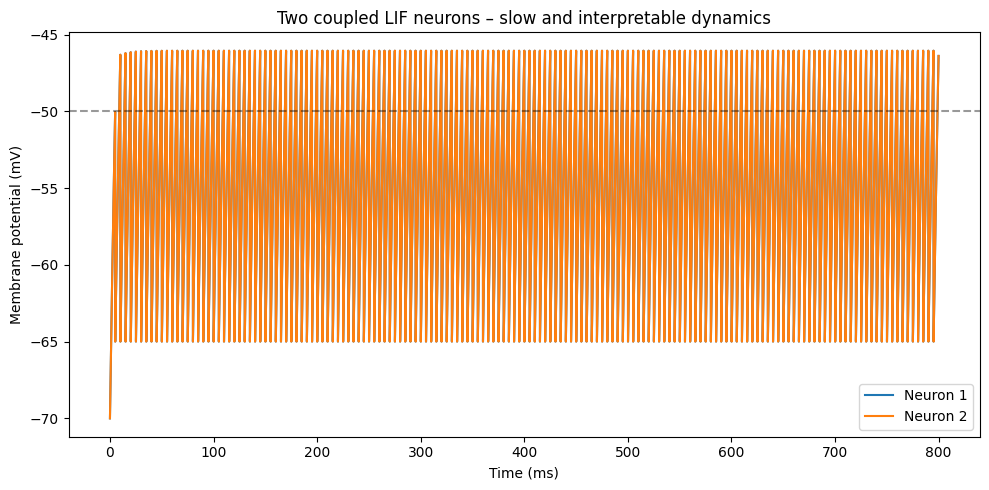

Spike times neuron 1 (ms): [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135. 140.
 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205. 210.
 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275. 280.
 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345. 350.
 355. 360. 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415. 420.
 425. 430. 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485. 490.
 495. 500. 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555. 560.
 565. 570. 575. 580. 585. 590. 595. 600. 605. 610. 615. 620. 625. 630.
 635. 640. 645. 650. 655. 660. 665. 670. 675. 680. 685. 690. 695. 700.
 705. 710. 715. 720. 725. 730. 735. 740. 745. 750. 755. 760. 765. 770.
 775. 780. 785. 790. 795.]
Spike times neuron 2 (ms): [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135. 1

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

# Parámetros (ajustados)
tau = 20*ms                 # Más lento
v_rest = -70*mV
v_reset = -65*mV
v_th = -50*mV
R = 100*Mohm
I = 0.9*nA                  # Corriente menor

# Modelo neuronal
eqs = '''
dv/dt = (-(v - v_rest) + R*I + I_syn) / tau : volt
dI_syn/dt = -I_syn / (10*ms) : volt
'''

G = NeuronGroup(
    2,
    model=eqs,
    threshold='v > v_th',
    reset='v = v_reset',
    refractory=5*ms,        # 🔑 periodo refractario
    method='euler'
)

G.v = v_rest
G.I_syn = 0*mV

# Sinapsis excitatoria más débil
S = Synapses(G, G, on_pre='I_syn += 1.0*mV')
S.connect(i=0, j=1)
S.connect(i=1, j=0)

# Monitores
M = StateMonitor(G, 'v', record=True)
Sp = SpikeMonitor(G)

run(800*ms)

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(M.t/ms, M.v[0]/mV, label='Neuron 1')
plt.plot(M.t/ms, M.v[1]/mV, label='Neuron 2')
plt.axhline(v_th/mV, linestyle='--', color='k', alpha=0.4)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Two coupled LIF neurons – slow and interpretable dynamics")
plt.legend()
plt.tight_layout()
plt.show()

print("Spike times neuron 1 (ms):", Sp.t[Sp.i==0]/ms)
print("Spike times neuron 2 (ms):", Sp.t[Sp.i==1]/ms)


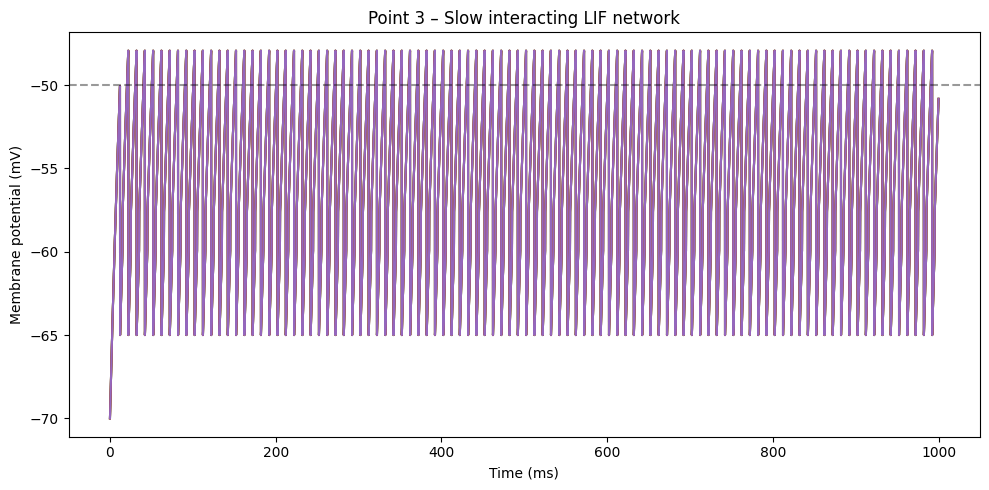

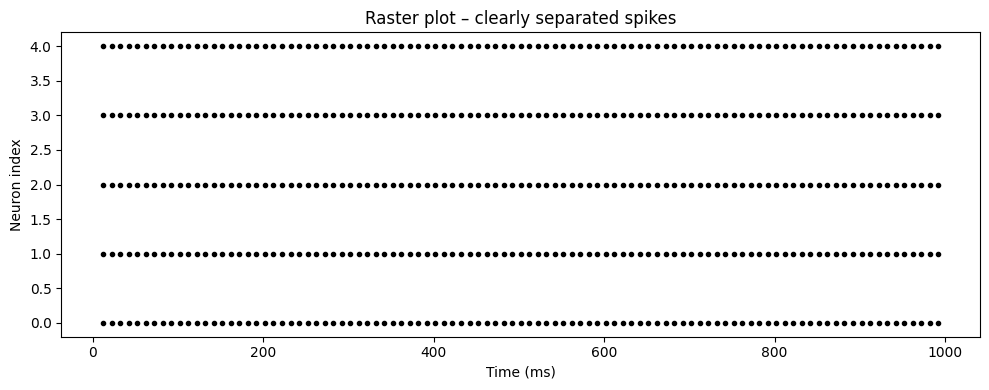

In [ ]:
from brian2 import *
import matplotlib.pyplot as plt

# Parámetros neuronales
tau = 30*ms
v_rest = -70*mV
v_reset = -65*mV
v_th = -50*mV
R = 100*Mohm
I = 0.6*nA          # 🔽 muy baja

# Modelo
eqs = '''
dv/dt = (-(v - v_rest) + R*I) / tau : volt
'''

# Grupo neuronal
G = NeuronGroup(
    5,
    model=eqs,
    threshold='v > v_th',
    reset='v = v_reset',
    refractory=10*ms,   # 🔑 largo
    method='euler'
)

G.v = v_rest

# Sinapsis excitatorias débiles y lentas
S = Synapses(G, G, on_pre='v_post += 0.5*mV')
S.connect(condition='i != j')
S.delay = 3*ms         # 🔑 evita cascadas instantáneas

# Monitores
M = StateMonitor(G, 'v', record=True)
Sp = SpikeMonitor(G)

run(1*second)

# Gráfica de potenciales
plt.figure(figsize=(10,5))
for i in range(5):
    plt.plot(M.t/ms, M.v[i]/mV, label=f'Neuron {i}')
plt.axhline(v_th/mV, linestyle='--', color='k', alpha=0.4)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Point 3 – Slow interacting LIF network")
plt.tight_layout()
plt.show()

# Raster plot
plt.figure(figsize=(10,4))
plt.plot(Sp.t/ms, Sp.i, '.k')
plt.xlabel("Time (ms)")
plt.ylabel("Neuron index")
plt.title("Raster plot – clearly separated spikes")
plt.tight_layout()
plt.show()
